# Module 1: The Digital Image - A World of Pixels

## Welcome to the Computer Vision Workshop!

Our journey into teaching machines to see begins with the most fundamental question: What *is* a digital image to a computer?

**Our Story for this Module:** We will discover that a beautiful, complex image is, to a computer, nothing more than a structured grid of numbers. We will learn how to load this grid of numbers, understand its properties, and perform basic mathematical operations on it to manipulate the image in powerful ways like changing its brightness, contrast, size, and orientation.

### **Setup: Installing and Importing Libraries**

First, we need to import our primary tool for computer vision: **OpenCV**. We also need **NumPy** for numerical operations (since images are just NumPy arrays) and **Matplotlib** to display our images within this notebook.

In [1]:
%pip install -q opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# This line is a magic command for Jupyter notebooks to display matplotlib plots inline.
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


---

## **Part 1: An Image is Just a NumPy Array**

Let's start by loading a simple black and white image. The function `cv2.imread()` reads an image from a file. The second argument, `cv2.IMREAD_GRAYSCALE`, tells OpenCV to load it as a single-channel grayscale image.

In [3]:
# All our assets are in the 'assets' folder
bw_image_path = '../assets/img_bw_18x18.png'

# Read the image as a grayscale NumPy array
bw_img = cv2.imread(bw_image_path, cv2.IMREAD_GRAYSCALE)

# Print the contents of the array
print("--- Image Pixel Data ---")
print(bw_img)

--- Image Pixel Data ---
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0]


### **Analysis: What are we looking at?**

This grid of numbers *is* the image. Each number is a **pixel** (picture element).

- **The Values:** For an 8-bit grayscale image, each pixel has a value from **0 (pure black)** to **255 (pure white)**.
- **The Shape:** We can check the dimensions and data type of this array to learn more about the image.

In [4]:
print(f"Image Shape (Height, Width): {bw_img.shape}")
print(f"Data Type: {bw_img.dtype}")

Image Shape (Height, Width): (18, 18)
Data Type: uint8


### **Displaying Images with Matplotlib**

While printing the array is useful for small images, we usually want to see the image itself. We'll use `matplotlib.pyplot.imshow()` for this.

**Important Note:** By default, Matplotlib uses a color map to display single-channel images. To show it correctly as grayscale, we must specify `cmap='gray'`.

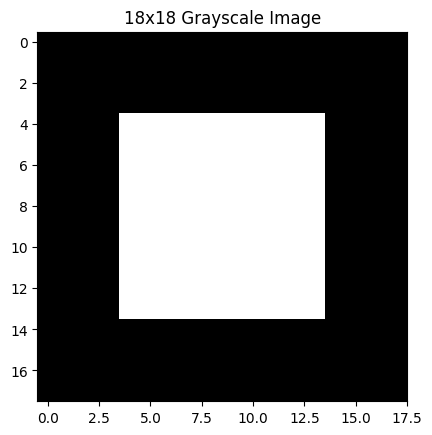

In [5]:
plt.imshow(bw_img, cmap='gray')
plt.title("18x18 Grayscale Image")
plt.show()

### **Part 2: Color Images - The Three Layers**

Color images work similarly, but instead of one grid of numbers, we have three: one for **Blue**, one for **Green**, and one for **Red**. This is the **BGR** color model. Our image array will now have a 3rd dimension to hold these three channels.

In [6]:
color_image_path = '../assets/Emerald_Lakes_New_Zealand_scr.jpg'

# Load the image in color (this is the default mode)
color_img = cv2.imread(color_image_path, cv2.IMREAD_COLOR)

print(f"Color Image Shape (Height, Width, Channels): {color_img.shape}")

Color Image Shape (Height, Width, Channels): (285, 427, 3)


#### **The OpenCV vs. Matplotlib Problem: BGR vs. RGB**

A very common point of confusion arises here:
- **OpenCV** loads color images in **BGR** order (Blue, Green, Red).
- **Matplotlib** expects images in **RGB** order (Red, Green, Blue).

If we display our BGR image directly, the colors will look wrong. We must convert it to RGB first.

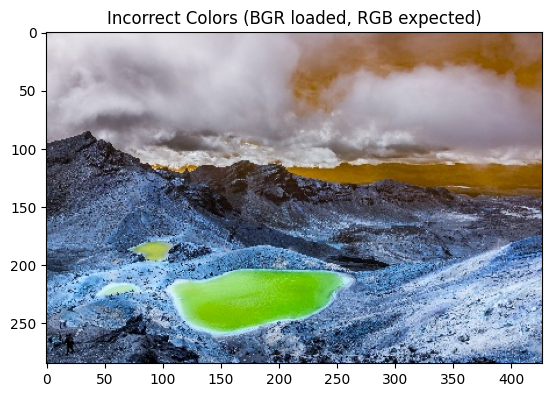

In [7]:
# Displaying the BGR image directly in Matplotlib (incorrect colors)
plt.imshow(color_img)
plt.title("Incorrect Colors (BGR loaded, RGB expected)")
plt.show()

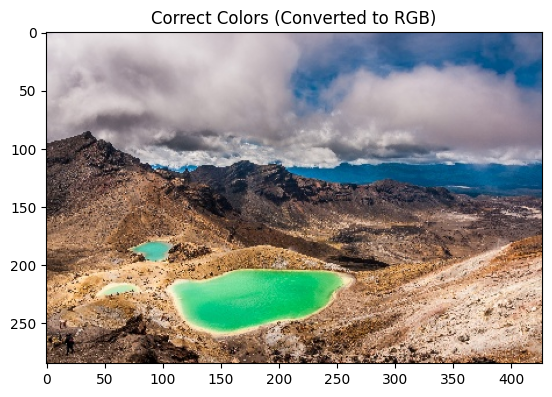

In [8]:
# Convert from BGR to RGB for correct display
rgb_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.title("Correct Colors (Converted to RGB)")
plt.show()

---

## **Part 3: Basic Image Manipulations**

Now that we understand images are just NumPy arrays, we can use standard array operations to manipulate them.

### **3.1 Cropping**

Cropping is as simple as slicing a NumPy array. The format is `image[startY:endY, startX:endX]`.

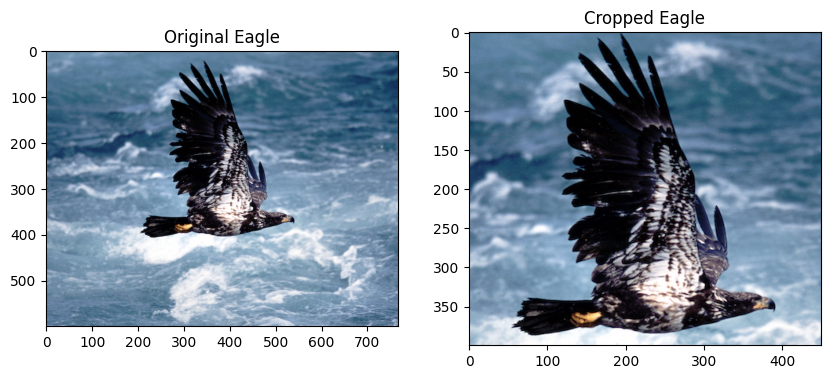

In [9]:
eagle_path = '../assets/Eagle_in_Flight.jpg'
eagle_img = cv2.cvtColor(cv2.imread(eagle_path), cv2.COLOR_BGR2RGB)

# Crop the image to focus on the eagle
# y-coordinates from 20 to 420, x-coordinates from 150 to 600
cropped_eagle = eagle_img[20:420, 150:600]

# Display side-by-side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(eagle_img)
ax[0].set_title("Original Eagle")
ax[1].imshow(cropped_eagle)
ax[1].set_title("Cropped Eagle")
plt.show()

### **3.2 Resizing**

We use `cv2.resize()` to change the dimensions of an image. We can either specify an absolute size or a scaling factor.

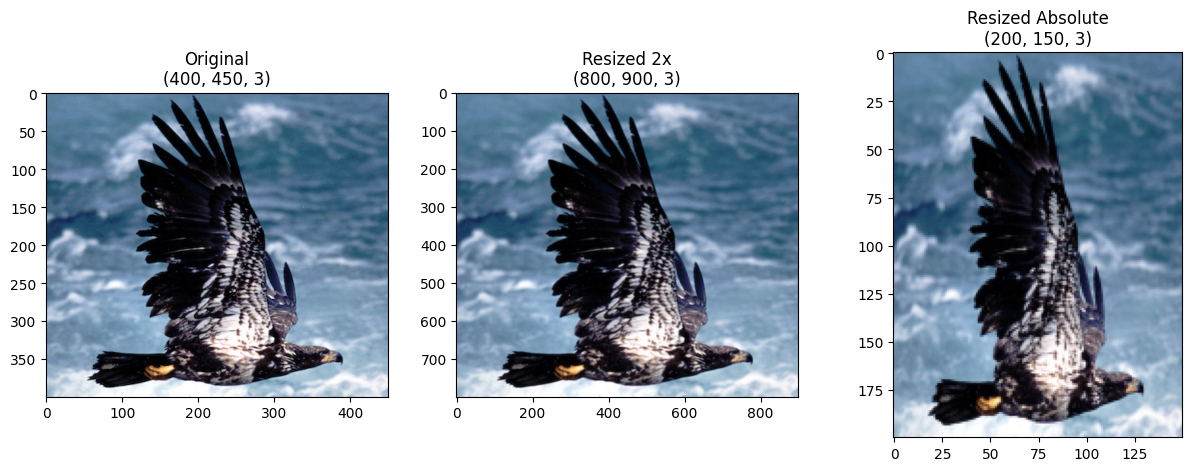

In [10]:
# Resize by specifying a scaling factor (e.g., 2x bigger)
resized_2x = cv2.resize(cropped_eagle, None, fx=2, fy=2)

# Resize by specifying an exact dimension (width, height)
desired_width = 150
desired_height = 200
resized_abs = cv2.resize(cropped_eagle, (desired_width, desired_height), interpolation=cv2.INTER_AREA)

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cropped_eagle)
ax[0].set_title(f"Original\n{cropped_eagle.shape}")
ax[1].imshow(resized_2x)
ax[1].set_title(f"Resized 2x\n{resized_2x.shape}")
ax[2].imshow(resized_abs)
ax[2].set_title(f"Resized Absolute\n{resized_abs.shape}")
plt.show()

### **3.3 Arithmetic Operations: Brightness & Contrast**

We can perform simple math on the entire image array to change its appearance.
- **Brightness:** Add or subtract a constant value from all pixels.
- **Contrast:** Multiply all pixels by a constant value.

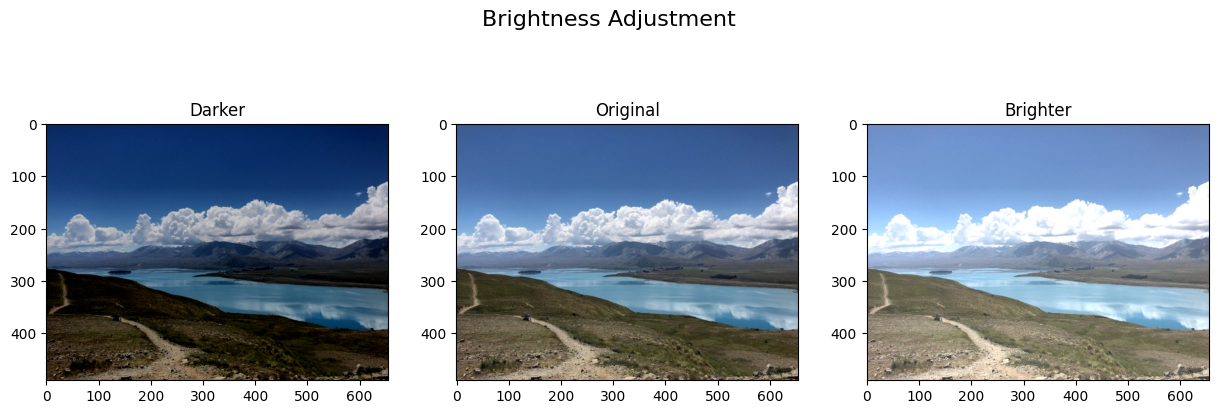

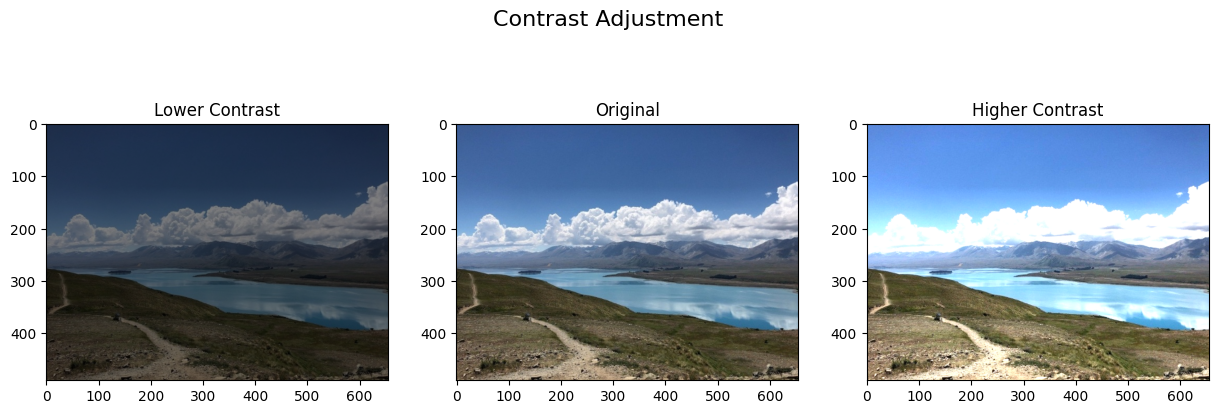

In [11]:
lake_path = '../assets/new-zealand-lake.jpg'
lake_img = cv2.cvtColor(cv2.imread(lake_path), cv2.COLOR_BGR2RGB)

# --- Brightness ---
# We must use np.clip to ensure pixel values stay within the valid [0, 255] range.
brighter_img = np.clip(lake_img.astype(int) + 50, 0, 255).astype(np.uint8)
darker_img = np.clip(lake_img.astype(int) - 50, 0, 255).astype(np.uint8)

# --- Contrast ---
higher_contrast = np.clip(lake_img.astype(float) * 1.5, 0, 255).astype(np.uint8)
lower_contrast = np.clip(lake_img.astype(float) * 0.5, 0, 255).astype(np.uint8)

# Display Brightness
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(darker_img)
ax[0].set_title("Darker")
ax[1].imshow(lake_img)
ax[1].set_title("Original")
ax[2].imshow(brighter_img)
ax[2].set_title("Brighter")
fig.suptitle('Brightness Adjustment', fontsize=16)
plt.show()

# Display Contrast
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(lower_contrast)
ax[0].set_title("Lower Contrast")
ax[1].imshow(lake_img)
ax[1].set_title("Original")
ax[2].imshow(higher_contrast)
ax[2].set_title("Higher Contrast")
fig.suptitle('Contrast Adjustment', fontsize=16)
plt.show()

---

## ⭐ You Try It! - Image Manipulation Challenge

Now it's your turn to combine these skills. In the cell below, we've loaded an image for you.

**Your Task:**
1.  **Crop** the image to focus on the main building.
2.  **Resize** the cropped image to be 300 pixels wide, while maintaining its aspect ratio.
3.  **Flip** the resized image horizontally.
4.  **Decrease the contrast** of the flipped image to give it a 'washed-out' look.

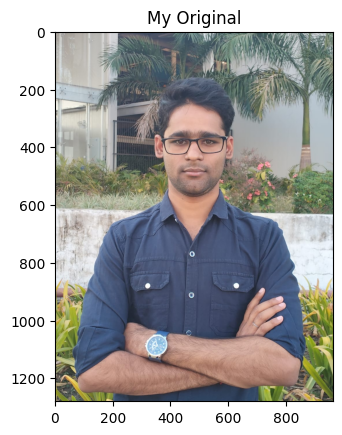

In [ ]:
building_path = '../assets/me.jpg' # You need to have this image in your assets folder
building_img = cv2.cvtColor(cv2.imread(building_path), cv2.COLOR_BGR2RGB)

plt.imshow(building_img)
plt.title("My Original")
plt.show()

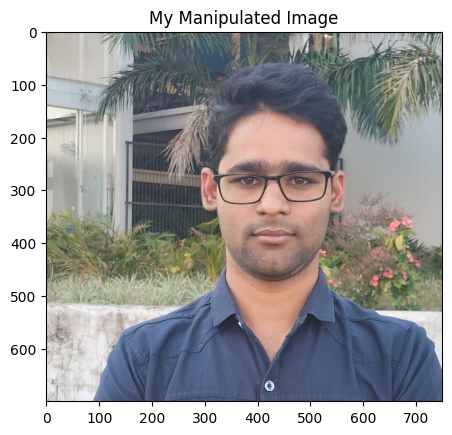

In [13]:
# YOUR CODE HERE

# Step 1: Crop the image
# Hint: You'll need to estimate the y and x coordinates. Something like [100:800, 250:750] is a good start.
cropped_building = building_img[100:800, 50:800] # Replace this line

# Step 2: Resize the cropped image to 300px width, maintaining aspect ratio
h, w, _ = cropped_building.shape
ratio = h / w
new_w = 300
new_h = int(new_w * ratio)
resized_building = cropped_building # Replace this line

# Step 3: Flip the resized image horizontally
flipped_building = resized_building # Replace this line

# Step 4: Decrease the contrast
final_image = flipped_building # Replace this line

# Display your final result
plt.imshow(final_image)
plt.title("My Manipulated Image")
plt.show()

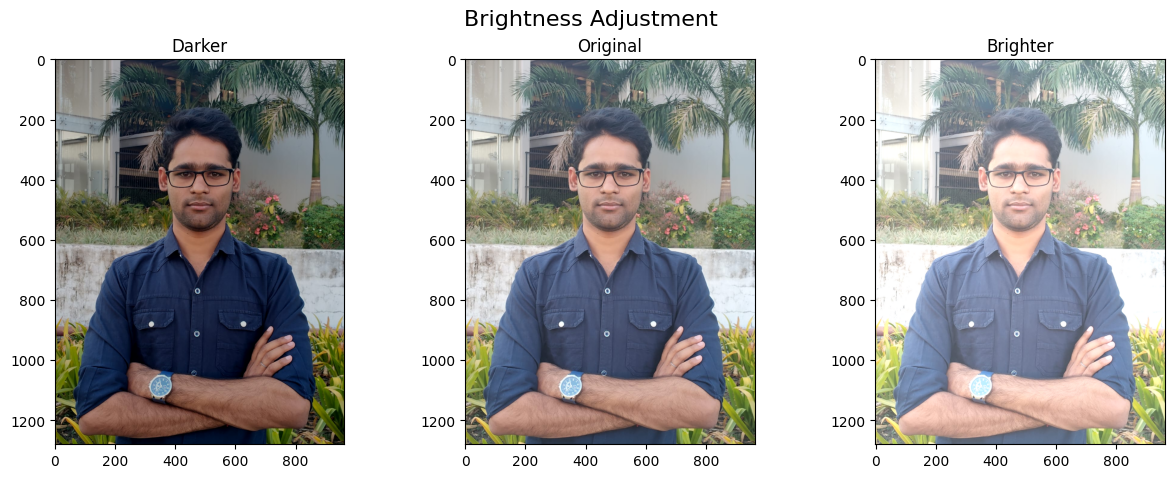

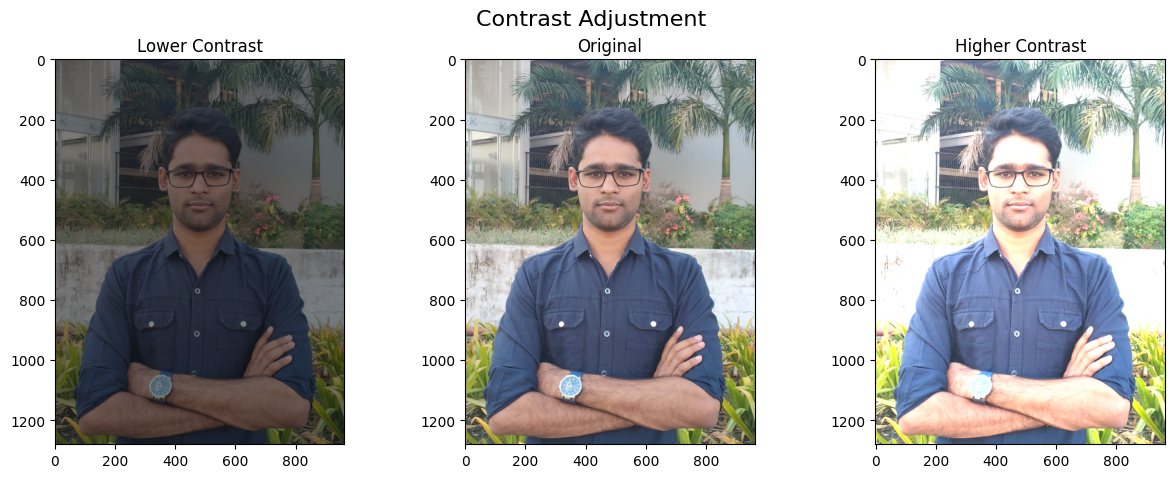

In [14]:
lake_path = '../assets/me.jpg'
lake_img = cv2.cvtColor(cv2.imread(lake_path), cv2.COLOR_BGR2RGB)

# --- Brightness ---
# We must use np.clip to ensure pixel values stay within the valid [0, 255] range.
brighter_img = np.clip(lake_img.astype(int) + 50, 0, 255).astype(np.uint8)
darker_img = np.clip(lake_img.astype(int) - 50, 0, 255).astype(np.uint8)

# --- Contrast ---
higher_contrast = np.clip(lake_img.astype(float) * 1.5, 0, 255).astype(np.uint8)
lower_contrast = np.clip(lake_img.astype(float) * 0.5, 0, 255).astype(np.uint8)

# Display Brightness
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(darker_img)
ax[0].set_title("Darker")
ax[1].imshow(lake_img)
ax[1].set_title("Original")
ax[2].imshow(brighter_img)
ax[2].set_title("Brighter")
fig.suptitle('Brightness Adjustment', fontsize=16)
plt.show()

# Display Contrast
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(lower_contrast)
ax[0].set_title("Lower Contrast")
ax[1].imshow(lake_img)
ax[1].set_title("Original")
ax[2].imshow(higher_contrast)
ax[2].set_title("Higher Contrast")
fig.suptitle('Contrast Adjustment', fontsize=16)
plt.show()

<details>
<summary>Click here for the solution</summary>

```python
# Step 1: Crop the image
cropped_building = building_img[100:800, 250:750]

# Step 2: Resize the cropped image to 300px width, maintaining aspect ratio
h, w, _ = cropped_building.shape
ratio = h / w
new_w = 300
new_h = int(new_w * ratio)
resized_building = cv2.resize(cropped_building, (new_w, new_h))

# Step 3: Flip the resized image horizontally
flipped_building = cv2.flip(resized_building, 1)

# Step 4: Decrease the contrast
final_image = np.clip(flipped_building.astype(float) * 0.7, 0, 255).astype(np.uint8)

# Display your final result
plt.imshow(final_image)
plt.title("My Manipulated Image")
plt.show()
```
</details>

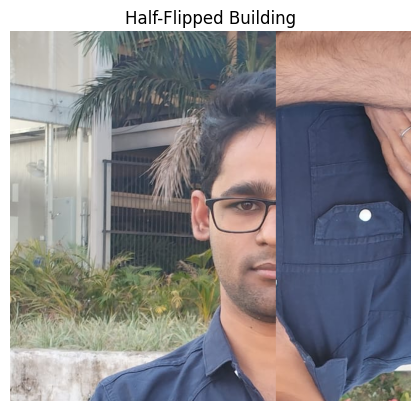

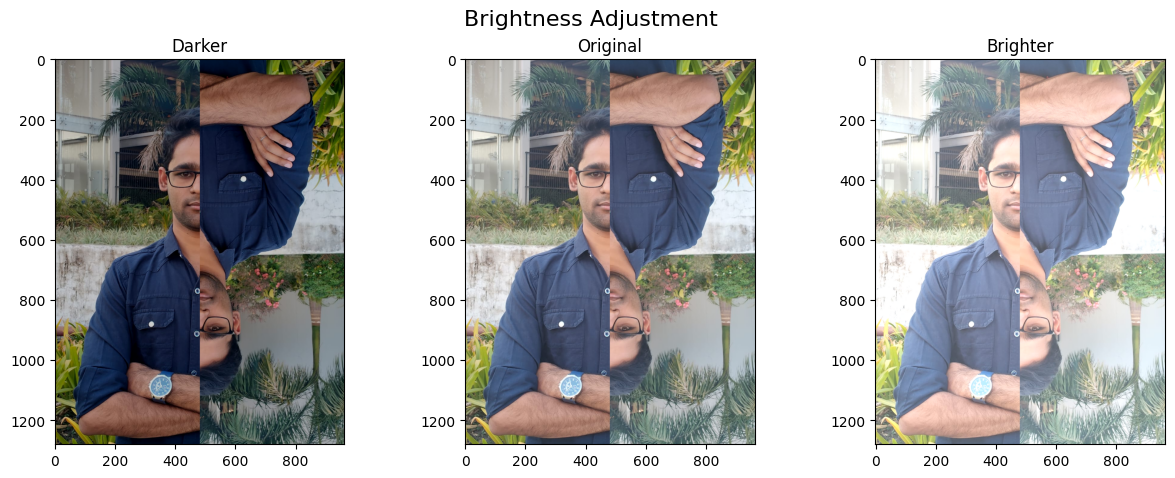

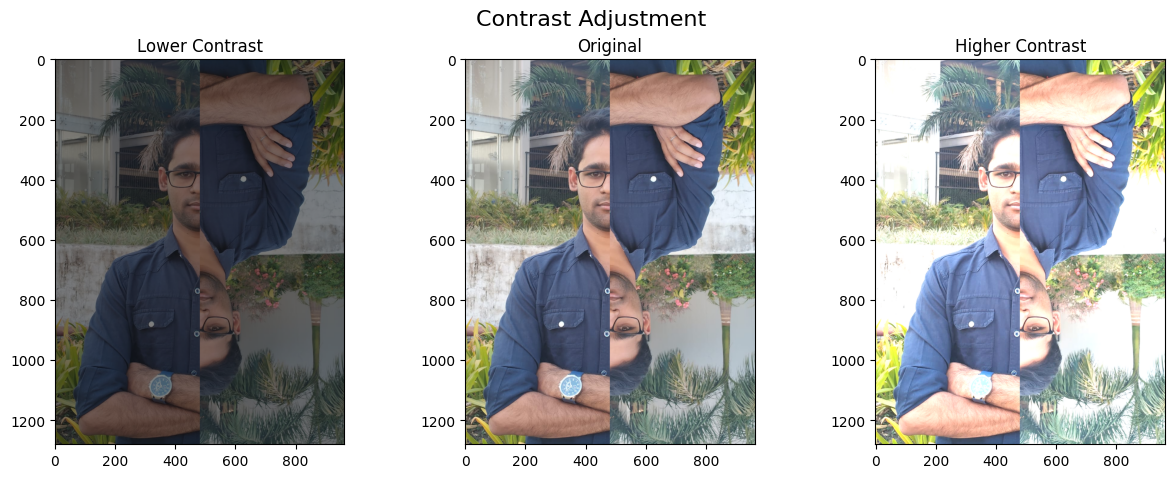

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assume `final_image` holds your manipulated image
lake_path = '../assets/me.jpg'
final_image = cv2.cvtColor(cv2.imread(lake_path), cv2.COLOR_BGR2RGB)
# Step 1: Split into halves
h, w, _ = final_image.shape
# h, w, _ = final_image[50:400, 100, 400]

mid = w // 2
left_half = final_image[:, :mid]
right_half = final_image[:, mid:]

# Step 2: Flip the right half horizontally
flipped_right = cv2.flip(right_half, 0)

# Step 3: Merge horizontally
merged_img = np.concatenate((left_half, flipped_right), axis=1)

# Step 4: Display the merged image
plt.imshow(merged_img[100:700, 50:700])
plt.title("Half-Flipped Building")
plt.axis('off')
plt.show()

# lake_path = merged_img
# lake_img = cv2.cvtColor(cv2.imread(lake_path), cv2.COLOR_BGR2RGB)

# --- Brightness ---
# We must use np.clip to ensure pixel values stay within the valid [0, 255] range.
brighter_img = np.clip(merged_img.astype(int) + 50, 0, 255).astype(np.uint8)
darker_img = np.clip(merged_img.astype(int) - 50, 0, 255).astype(np.uint8)

# --- Contrast ---
higher_contrast = np.clip(merged_img.astype(float) * 1.5, 0, 255).astype(np.uint8)
lower_contrast = np.clip(merged_img.astype(float) * 0.5, 0, 255).astype(np.uint8)

# Display Brightness
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(darker_img)
ax[0].set_title("Darker")
ax[1].imshow(merged_img)
ax[1].set_title("Original")
ax[2].imshow(brighter_img)
ax[2].set_title("Brighter")
fig.suptitle('Brightness Adjustment', fontsize=16)
plt.show()

# Display Contrast
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(lower_contrast)
ax[0].set_title("Lower Contrast")
ax[1].imshow(merged_img)
ax[1].set_title("Original")
ax[2].imshow(higher_contrast)
ax[2].set_title("Higher Contrast")
fig.suptitle('Contrast Adjustment', fontsize=16)
plt.show()

## **Conclusion**

Congratulations! You've mastered the fundamentals of digital images.

We've learned that images are just grids of numbers (NumPy arrays) and that we can use simple array slicing and arithmetic to perform powerful manipulations like cropping, resizing, and adjusting brightness/contrast.

**In our next module,** we will move beyond manipulating the whole image and learn how to detect specific features within it, like edges and lines, using a technique called convolution.